<a href="https://colab.research.google.com/github/Shantanuh10/Airbnb_EDA_Project-/blob/main/Shantanu's_Notebook_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
file_path = '/content/drive/MyDrive/Capstone Project (AlmaBetter)/Airbnb EDA Project/Copy of Airbnb NYC 2019.csv'
airbnb_df=pd.read_csv(file_path)

In [12]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [13]:
airbnb_df.shape

(48895, 16)

In [14]:
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [15]:
columns_to_keep = ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price', 'minimum_nights', 'number_of_reviews' , 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

In [16]:
airbnb_df = airbnb_df[columns_to_keep]

In [17]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               38843 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

In [18]:
# Drop null observations
airbnb_non_null_df = airbnb_df.dropna()

In [19]:
airbnb_non_null_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   room_type                       38821 non-null  object 
 7   price                           38821 non-null  int64  
 8   minimum_nights                  38821 non-null  int64  
 9   number_of_reviews               38821 non-null  int64  
 10  reviews_per_month               38821 non-null  float64
 11  calculated_host_listings_count  38821 non-null  int64  
 12  availability_365                

In [20]:
airbnb_non_null_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,Entire home/apt,200,3,74,0.59,1,129


### Finding Most Preferred Room Type

In [21]:

airbnb_room_type = airbnb_non_null_df.room_type.unique()

In [22]:
airbnb_room_type

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [41]:
# Which is the most preferred room type?
airbnb_roomtype_frequency = dict(airbnb_non_null_df.room_type.value_counts())

In [42]:
airbnb_roomtype_frequency

{'Entire home/apt': 20321, 'Private room': 17654, 'Shared room': 846}

In [25]:
# Importing matplotlib.pyplot 
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Most Preferred Rooms')

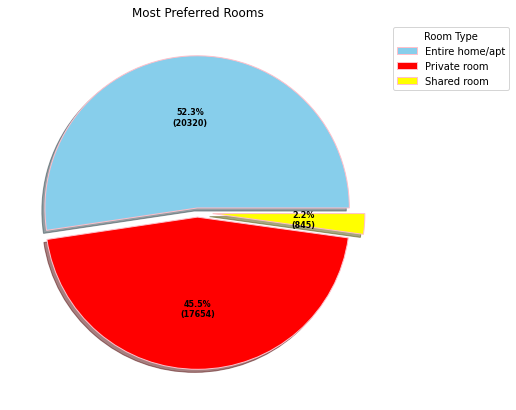

In [92]:
# Creating Dataset 

room_type = list(airbnb_roomtype_frequency.keys())
data = list(airbnb_roomtype_frequency.values())

# Creating color parameters

colors = ( "skyblue", "red", "yellow",)

# Creating explode data

explode = (0.03, 0.03, 0.1)

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "pink" }

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Creating Pie Chart

# Creating plot
fig, airbnb_pie_chart = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = airbnb_pie_chart.pie(data, autopct = lambda pct: func(pct, data),                                              
                                                explode = explode,
                                                shadow = True,
                                                colors = colors,
                                                startangle = 0,
                                                wedgeprops = wp,
                                                textprops = dict(color ="black"))

# Adding legend
airbnb_pie_chart.legend(wedges, room_type,
                        title ="Room Type",
                        loc ="upper left",
                        bbox_to_anchor =(1, 0, 0.5,1))

plt.setp(autotexts, size = 8, weight = "bold")
airbnb_pie_chart.set_title("Most Preferred Rooms")
  

